<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Чтение данных
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# Чему равна размерность таблицы? 
df.shape

(44744, 12)

In [3]:
# В каком формате представлен порядок слов в признаке «Пол, возраст»?
# Ответ:<Пол , возраст , дата рождения>
# Какой тип данных имеют все столбцы?
# Ответ: object
# Выберите все признаки, в которых есть пропуски в данных:
# Ответ:Опыт работы,Последняя/нынешняя должность,Последнее/нынешнее место работы
# Сколько уникальных значений содержится в столбце «Опыт работы»?
# Ответ:44413
# Какая из искомых должностей самая распространённая?
# Ответ:Системный администратор


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
# Первые 5 строк
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [5]:
# Последние 10 строк
df.tail(10)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44734,"Мужчина , 23 года , родился 12 августа 1995",85000 руб.,Технический специалист со знанием нем/англ языков,"Москва , м. Коломенская , готов к переезду , ...",полная занятость,"гибкий график, полный день",Опыт работы 4 года 9 месяцев Август 2018 — по...,Plazius,Инженер технической поддержки,Высшее образование 2018 Московский государств...,07.05.2019 11:42,Имеется собственный автомобиль
44735,"Мужчина , 25 лет , родился 29 апреля 1993",70000 руб.,Тестировщик ПО Работу уже нашёл,"Москва , м. Сокольники , не готов к переезду ...",полная занятость,полный день,Опыт работы 2 года 4 месяца Тестировщик ПО Ра...,Юрайт,Тестировщик ПО,Высшее образование 2014 Московский государств...,21.09.2018 11:26,Не указано
44736,"Мужчина , 32 года , родился 26 января 1987",800 бел.руб.,"мастер по ремонту, водитель,продавец-консультант","Новополоцк , готов к переезду , готов к команд...","частичная занятость, полная занятость","гибкий график, полный день, сменный график",Опыт работы 10 лет 5 месяцев мастер по ремонт...,"""Электросервис и ко""",Специалист по продажам,Высшее образование 2011 Полоцкий государственн...,22.04.2019 01:03,Не указано
44737,"Мужчина , 31 год , родился 8 сентября 1987",70000 руб.,Руководитель IT-отдела,"Санкт-Петербург , м. Горьковская , не готов к...",полная занятость,полный день,Опыт работы 12 лет 8 месяцев Сентябрь 2013 — ...,ООО «Сендика Груп»,Руководитель отдела IT,Высшее образование 2010 Санкт-Петербургский г...,05.04.2019 18:05,Не указано
44738,"Мужчина , 37 лет , родился 12 марта 1982",150000 руб.,head of helpdesk,"Москва , м. Пятницкое шоссе , готов к переезд...",полная занятость,полный день,Опыт работы 17 лет 1 месяц Май 2017 — по наст...,"Будущее, НПФ",Начальник отдела технического обеспечения,Высшее образование 2005 Московский Государстве...,08.04.2019 09:47,Не указано
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
# Основная информация, в том числе о непустых значений и типах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
# Количество непустых значений
df.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

In [8]:
# Всего непустых значений
df.count().sum()

536757

In [8]:
# Пропущенные значения
df.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [9]:
# Статистическая информация о столбцах
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
# Образование
df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: x.split(' образование')[0])
df.drop('Образование и ВУЗ', axis=1, inplace=True)

In [11]:
# Проверка полученных категорий:
df.Образование.unique()

array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

In [12]:
# Сколько соискателей имеет средний уровень образования:
(df.Образование == 'Среднее').sum()

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [13]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


In [14]:
# Пол
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])
print(df['Пол'].unique())
# Возраст
df['Возраст'] = df['Пол, возраст'].apply(lambda x: int(x[10:14].replace(' ','')))
df.drop('Пол, возраст', axis=1, inplace=True)

['М' 'Ж']


In [15]:
# Процент женских резюме
print(round((df['Пол'] == 'Ж').sum() / int(df['Пол'].count()) * 100, 2))
# Средний возраст соискателя
round(df['Возраст'].mean(), 1)

19.07


32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [16]:
#Скрытые пропуски:
df['Опыт работы'] = df['Опыт работы'].apply(lambda x: pd.NA if x == 'Не указано' else x)
df['Опыт работы'].isna().sum()

170

In [17]:
def get_month(x):
    if x is np.nan or x is pd.NA or x is None:
        return x
    
    if x.split(' ')[3] in['год','года','лет']:
        year = int(x.split(' ')[2])
        if x.split(' ')[4].isdigit():
            month = int(x.split(' ')[4])
        else:
            month = 0
        months = year * 12 + month
    elif x.split(' ')[3] in ['месяц','месяца','месяцев']:
        months = int(x.split(' ')[2])
    return months

# x = df['Опыт работы'].iloc[1]
# print(get_month(x))

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_month)
df.drop('Опыт работы', axis=1, inplace=True)

In [18]:
# Медианный опыт работы в месяцах
df['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [19]:
# Разделение на категории по городам
def get_city(x):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань',
                     'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                     'Красноярск', 'Пермь', 'Воронеж','Волгоград'] 
    if x.split(' ')[0] == 'Москва':
        city = 'Москва'
    elif x.split(' ')[0] == 'Санкт-Петербург':
        city = 'Санкт-Петербург'
    elif x.split(' ')[0] in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
    return city
    
df['Город'] = df['Город, переезд, командировки'].apply(get_city)

print(df['Город'].unique())

['другие' 'Москва' 'город-миллионник' 'Санкт-Петербург']


In [20]:
# Процент из С-П.:
print(round((df['Город'] == 'Санкт-Петербург').sum() / int(df['Город'].count()) * 100))


11


In [21]:
#Готовность к переезду
def get_ready_to_move(x):
    if x.split(', ')[1].split('.')[0].replace(' ','') == 'м':
        if x.split('м. ')[1].split(', ')[1].split(' ')[0].replace(' ','') =='не':
            return False
        else:
            return True
    if x.split(', ')[1].split(' ')[0].replace(' ','') == 'не':
        return False
    else:
        return True
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_ready_to_move)
#print(df['Город, переезд, командировки'].iloc[11], get_ready_to_move(df['Город, переезд, командировки'].iloc[11]))

In [22]:
# Готовность к командировкам
def get_ready_for_business_trips(x):
    if 'командировк' not in x:
        return False
    if x.split(', ')[1].split('.')[0].replace(' ','') == 'м':
        if x.split('м. ')[1].split(', ')[2].split(' ')[0].replace(' ','') =='не':
            return False
        else:
            return True
    if x.split(', ')[2].split(' ')[0].replace(' ','') == 'не':
        return False
    else:
        return True
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_ready_for_business_trips)
df.drop('Город, переезд, командировки', axis=1, inplace=True)
#print(df['Город, переезд, командировки'].iloc[11], get_ready_for_business_trips(df['Город, переезд, командировки'].iloc[11]))

In [23]:
# Процент соискателей, готовый одновременно к переездам и командировкам
full_ready = (df['Готовность к переезду']*df['Готовность к командировкам']).sum()
percent = round(full_ready/df['Готовность к переезду'].count()*100)
print(percent)


32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [24]:
# One Hot Encoding преобразование, столбец "Занятость"
hot_dict = {key: [] for key in ['полная занятость',  'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']}
for item in df['Занятость']:
    for hot_key in hot_dict.keys():
        hot_dict[hot_key].append(hot_key in item)
df_hot = pd.DataFrame(hot_dict)
if 'полная занятость' not in df.columns:
    df = pd.concat([df, df_hot], axis=1)

In [25]:
# One Hot Encoding преобразование, столбец "График"
hot_dict = {'полный день': [],
 'сменный график': [],
 'гибкий график': [],
 'удаленная работа': [],
 'вахтовый метод': []}
for item in df['График']:
    for hot_key in hot_dict.keys():
        hot_dict[hot_key].append(hot_key in item)
df_hot = pd.DataFrame(hot_dict)
if 'полный день' not in df.columns:
    df = pd.concat([df, df_hot], axis=1)
df.drop('Занятость', axis=1, inplace=True)
df.drop('График', axis=1, inplace=True)

In [26]:
# Сколько людей ищут проектную работу и волонтёрство?
print((df['проектная работа']*df['волонтерство']).sum())
# Сколько людей хотят работать вахтовым методом и с гибким графиком?
print((df['вахтовый метод']*df['гибкий график']).sum())


436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [27]:
# prepare applicants data
currency_map = {
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'KZT': 'KZT',
    'EUR': 'EUR',
    'USD': 'USD',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN',
}
salary_currency = df['ЗП'].apply(lambda x: x.split(' ')[1])  # столбец с валютой
salary_currency = salary_currency.apply(lambda x: currency_map[x])  # столбец с валютой в формате ISO
salary_value = np.array([float(value) for value in df['ЗП'].apply(lambda x: x.split(' ')[0])])  # желаемая зп в валюте
salary_date = pd.to_datetime(df['Обновление резюме']).apply(lambda x: x.date()) # дата обновления резюме в формате DateTime.date()
df['Обновление резюме'] = salary_date

In [28]:
# prepare currancy data
df_currancy = pd.read_csv('ExchangeRates.csv')
df_currancy['date'] = pd.to_datetime(df_currancy['date']).apply(lambda x: x.date())  # дата в фломате DateTime.date()
# формируем разбиение по валютам для ускорения работы
# фактически кешируем индексы поиска нужной валюты    
df_currancy_map = {key: val for key, val in df_currancy.groupby('currency')}

In [29]:
salary_coef = []

for app_currency, app_value, app_date in zip(tqdm(salary_currency), salary_value, salary_date):
    if app_currency == 'RUB':
        salary_coef.append(1)
    else:
        # индекс интересующей валюты в интересующую дату
        curr_idx = np.where(df_currancy_map[app_currency].date == app_date)[0][0]
        curr_data = df_currancy_map[app_currency].iloc[curr_idx]  # данные о валюте в интересующую дату
        salary_coef.append(curr_data.close / curr_data.proportion) # коэффициент для перевода в рубли
df['ЗП (руб)'] = salary_value * np.array(salary_coef)
df.drop('ЗП', axis=1, inplace=True)

100%|█████████████████████████████████████████████████████████████████████████| 44744/44744 [00:01<00:00, 37559.69it/s]


In [30]:
# Медианная зарплата
round(df['ЗП (руб)'].median() / 1000)

59

In [31]:
# Сверяем DateFrame 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  object 
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

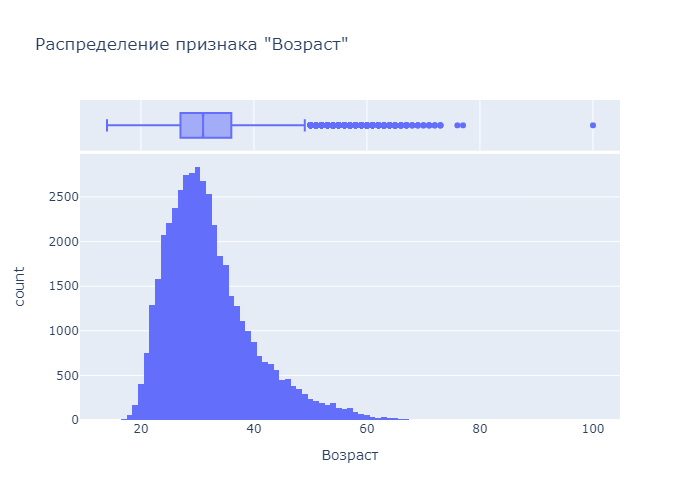

In [32]:
import plotly.express as px

px.histogram(df,
             x = 'Возраст', 
             nbins = 100, 
             marginal = 'box', 
             title='Распределение признака "Возраст"').show('png')


In [33]:
df.Возраст.mode()

0    30
Name: Возраст, dtype: int64

Ваши выводы по графику здесь: \
Мода распределения равна 30 годам, медиана — 31 году. Межквантильный размах составляет 9 лет (от 27 до 36 лет).\
Минимальное значение — 14 лет, максимальное — 100 лет. После пенсионный возраст соискателей возможно причислить к выбросам.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

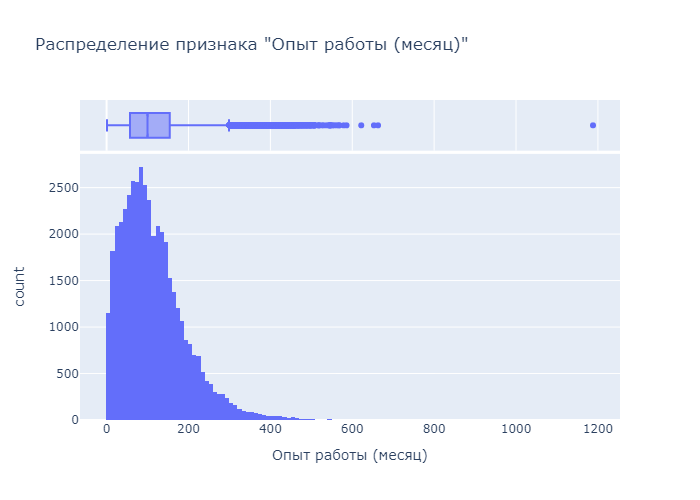

In [34]:
# ваш код здесь
px.histogram(df,
             x = 'Опыт работы (месяц)', 
             nbins = 200, 
             marginal = 'box', 
             title='Распределение признака "Опыт работы (месяц)"',).show('png')



In [35]:
df['Опыт работы (месяц)'].mode()

0    81
Name: Опыт работы (месяц), dtype: object

Ваши выводы здесь:\
Мода распределения составляет 89 месяцев, медиана — 100 месяцев. Межквартильный размах равен 97 месяцам (57-154 месяца).\
Наибольшая частота (2720) встречаемости для значений опыта 80-89 месяцев.\
Минимальное значение признак —  1 месяц опыта, а максимальное — 1188.\
Значения более 600 месяцев можно причислить к аномалии, особенно выбивается из распределения опыт 1188 месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


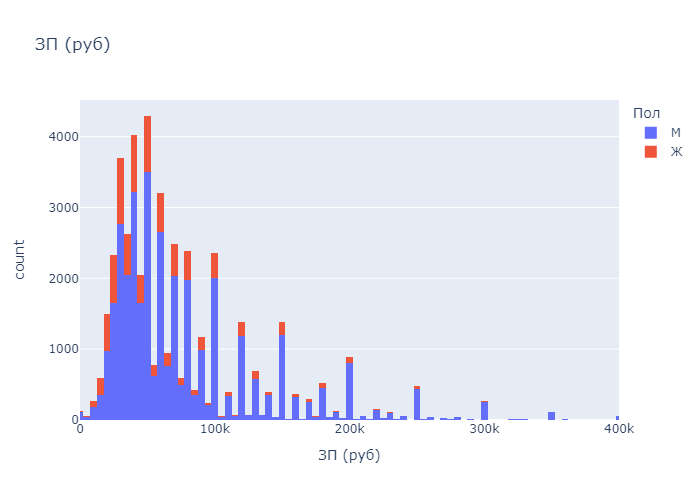

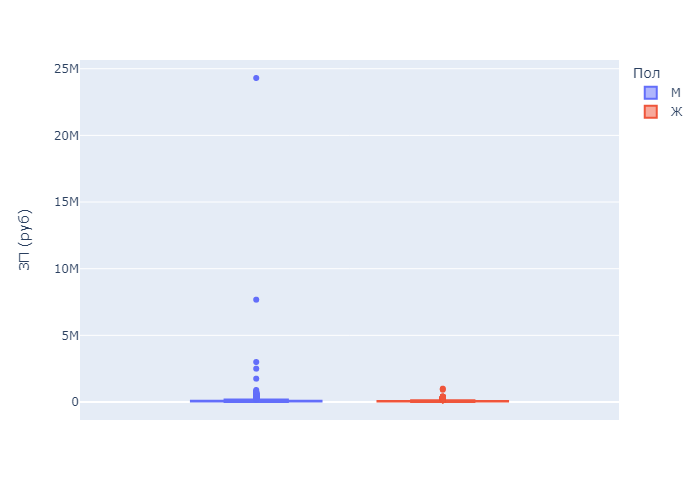

In [52]:
fig = px.histogram(df, x="ЗП (руб)", title='ЗП (руб)', color="Пол")
fig.update_xaxes(range=[0, 400000])
fig.show('png')
fig = px.box(df, y="ЗП (руб)", color="Пол")
fig.show('png')

Ваши выводы здесь:\
Заработная плата большинства соискателей находится в интервале 47500 - 52500 руб.\
Предельные значения признака составляют 1000 руб и 24304880 руб, межквартильный размах примерно 144000 руб(от 37000 до 181000).\ Зарплаты более 1000000 руб и до 1000 руб можно было бы отнести к выбросам.\
Указание гигантских зарплат более 1000000 руб характерно мужчинам, для женщин это предельная величина. 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

                     ЗП (руб)
Образование                  
Высшее                60000.0
Неоконченное высшее   50000.0
Среднее               40000.0
Среднее специальное   40000.0


<Axes: title={'center': 'Зависимость медианной ЗП от Образования'}, xlabel='Образование'>

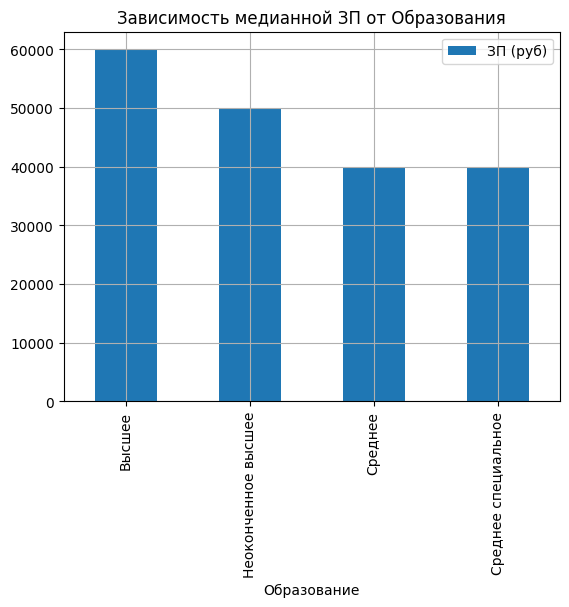

In [54]:
# ваш код здесь
salary = df.loc[df['ЗП (руб)']<1000000]
salary1 = salary[['Образование','ЗП (руб)']].groupby('Образование').median()
print(salary1)
salary1.plot.bar(title='Зависимость медианной ЗП от Образования', grid=1)

Ваши выводы здесь:\
Чем выше образование, тем выше уровень заработной платы, поэтому признак уровня образования важен при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

                  ЗП (руб)
Город                     
Москва             85000.0
Санкт-Петербург    60000.0
город-миллионник   40000.0
другие             40000.0


<Axes: title={'center': 'Зависимость медианной ЗП от Города'}, xlabel='Город'>

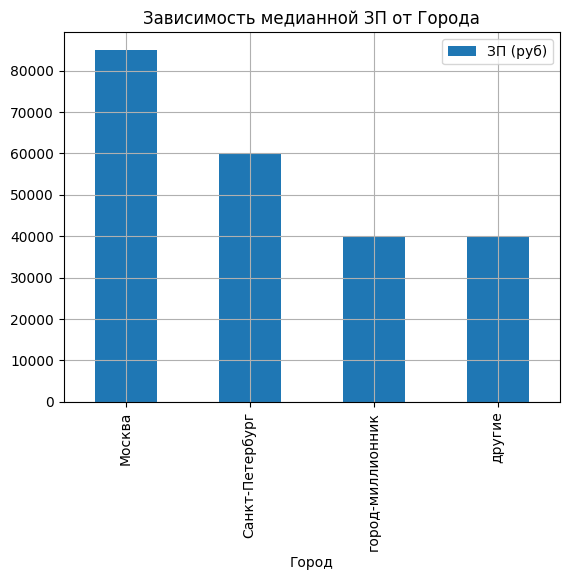

In [55]:
salary2 = salary[['Город','ЗП (руб)']].groupby('Город').median()
print(salary2)
salary2.plot.bar(title='Зависимость медианной ЗП от Города', grid=1)

                  ЗП (руб)
Город                     
Москва            899999.0
Санкт-Петербург   645170.0
город-миллионник  511680.6
другие            923982.0


<Axes: title={'center': 'Зависимость размаха ЗП от Города'}, xlabel='Город'>

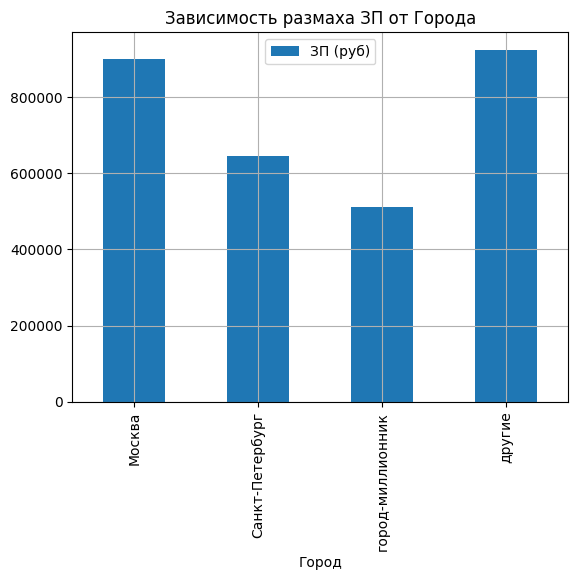

In [56]:
salary3 = salary[['Город','ЗП (руб)']].groupby('Город').max()-salary[['Город','ЗП (руб)']].groupby('Город').min()
print(salary3) 
salary3.plot.bar(title='Зависимость размаха ЗП от Города',grid=1 )

Ваши выводы здесь:\
Максимальная медианная зарплата в Москве(85 000 руб), размах в этом городе около 900000 руб. На втором месте по медианному уровню зарплаты идет Санкт-Петербург 60000руб с размахом около 645000 руб. Размах в городах миллионниках также в десятикратном масштабе превышает медианную заработную плату.
Стоит отметить категорию "Другие" с минимальной медианной зарплатой 40000 руб и максимальным размахом почти 924000 руб. Признак города важен для прогнозирования.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

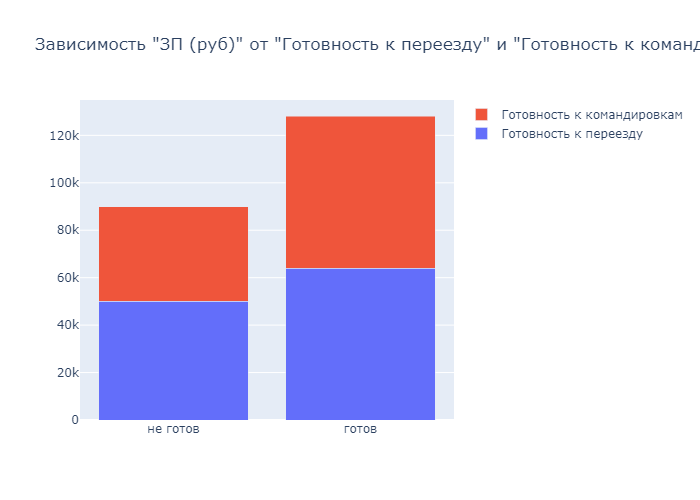

In [57]:
salary4 = df[['Готовность к переезду','ЗП (руб)']].groupby('Готовность к переезду').median()
prepare_to_reloc_x, prepare_to_reloc_y = [], []
for x, y in salary4.iterrows():
    prepare_to_reloc_x.append('готов' if x else 'не готов')
    prepare_to_reloc_y.append(int(y))
salary5 = df[['Готовность к командировкам','ЗП (руб)']].groupby('Готовность к командировкам').median()
prepare_to_b_trip_x, prepare_to_b_trip_y = [], []
for x, y in salary5.iterrows():
    prepare_to_b_trip_x.append('готов' if x else 'не готов')
    prepare_to_b_trip_y.append(int(y))
# idx_prepare_all = df['Готовность к переезду'] & df['Готовность к командировкам']
# prepare_all_y = [df['ЗП (руб)'][idx_prepare_all].median(), 
#                  df['ЗП (руб)'][~idx_prepare_all].median()]
bar1 = go.Bar(x=prepare_to_reloc_x, y=prepare_to_reloc_y, name='Готовность к переезду')
bar2 = go.Bar(x=prepare_to_b_trip_x, y=prepare_to_b_trip_y, name='Готовность к командировкам')
fig = go.Figure(
    data=[bar1, bar2],
    layout=go.Layout(barmode='stack', title = 'Зависимость "ЗП (руб)" от "Готовность к переезду" и "Готовность к командировкам"')
    
)
fig.show('png')

Ваши выводы здесь:\
Не готовность даже к командировкам "штрафуется" наименьшей медианной зарплатой. Готовность к командировкам и переездам поощряется большей заработной платой.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

         ЗП (руб)
Возраст          
14        60000.0
15         6000.0
16        40000.0
17        27500.0
18        25302.0
...           ...
72        75000.0
73        62500.0
76        45000.0
77        90000.0
100       60000.0

[63 rows x 1 columns]                      ЗП (руб)
Образование                  
Высшее                60000.0
Неоконченное высшее   50000.0
Среднее               40000.0
Среднее специальное   40000.0


<Axes: xlabel='Возраст', ylabel='Образование'>

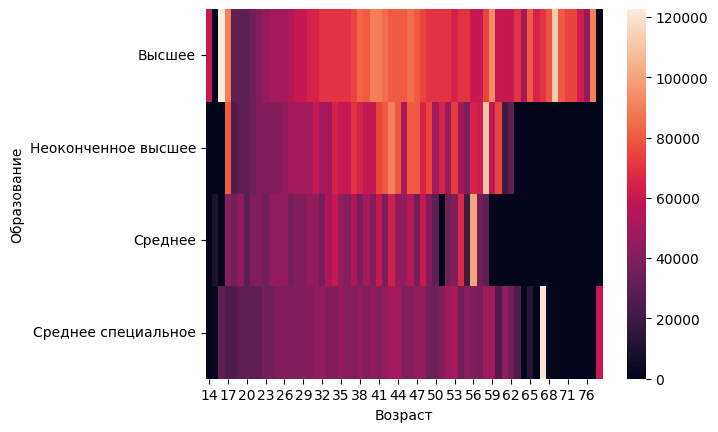

In [58]:
# ваш код здесь
salary_age = df[['Возраст','ЗП (руб)']].groupby('Возраст').median()
salary_edy = df[['Образование','ЗП (руб)']].groupby('Образование').median() 

table = pd.pivot_table(df, values='ЗП (руб)',index=['Образование'], columns=['Возраст'], aggfunc='median', fill_value=0)
print(salary_age, salary_edy)

sns.heatmap(table)

Ваши выводы здесь:\
По тепловой карте видно, чем выше образование, тем больше возможность карьерного роста. На уровень зарплаты со средним образованием возраст и опыт практически не влияет, в отличие от увеличения зарплат с высшим образованием с увеличением возраста, что связано с увеличением опыта.
Самые возрастные соискатели имеют высшее образование.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

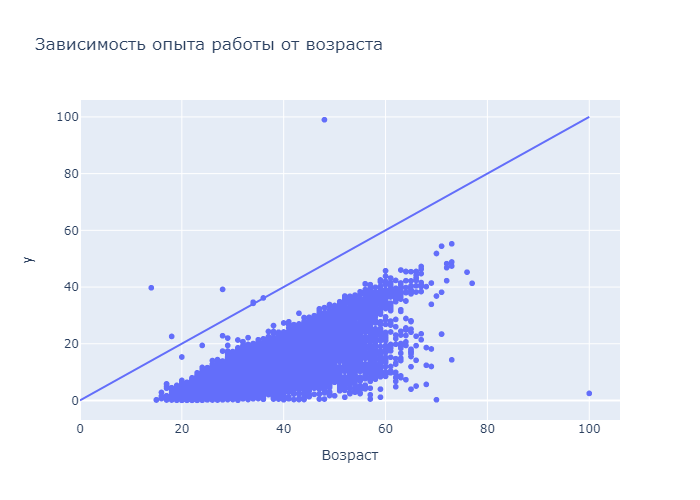

In [60]:
# ваш код здесь
fig = px.scatter(df, df['Возраст'], df['Опыт работы (месяц)']/12, title='Зависимость опыта работы от возраста')
fig.add_trace(px.line(x=[0, 100], y=[0, 100]).data[0]).show('png')
#Сколько точек лежат строго выше построенной прямой?
# 7 точек

Ваши выводы здесь: по диаграмме рассеяния обнаружено 7 случаев, когда опыт превышает возраст соискателя. Следует также обратить внимания на случаи пожилого возраста с малым опытом (например, опыт 2.5 лет в 100 лет) и юного возраста с опытом, превышающим дееспособный возраст.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


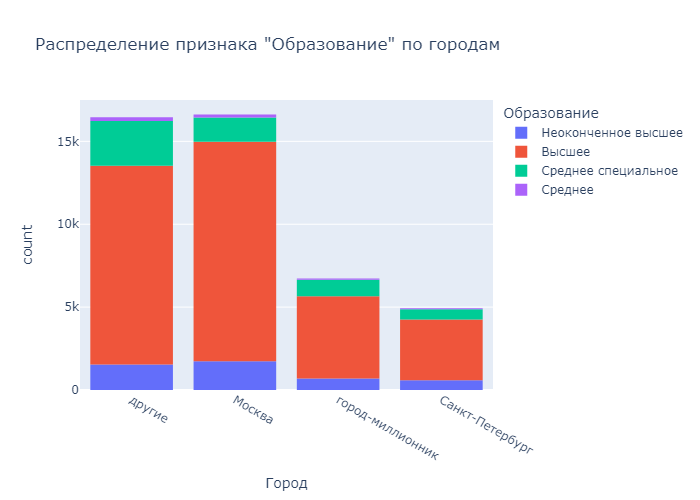

In [61]:
px.histogram(df,
             x = 'Город', 
             nbins = 200,
             title='Распределение признака "Образование" по городам', color = 'Образование').show('png')

На данной гистограмме мы наблюдаем распределение уровней образования по городам.\
Во всех городах преобладает высшее образование(по количеству соискателей), особенно в Москве и категории "другие", в Санкт-Петербурге и городах-миллионниках процент высшего образования в 2-3 раза ниже. Процент среднего образования сопостовим с неоконченным высшим.


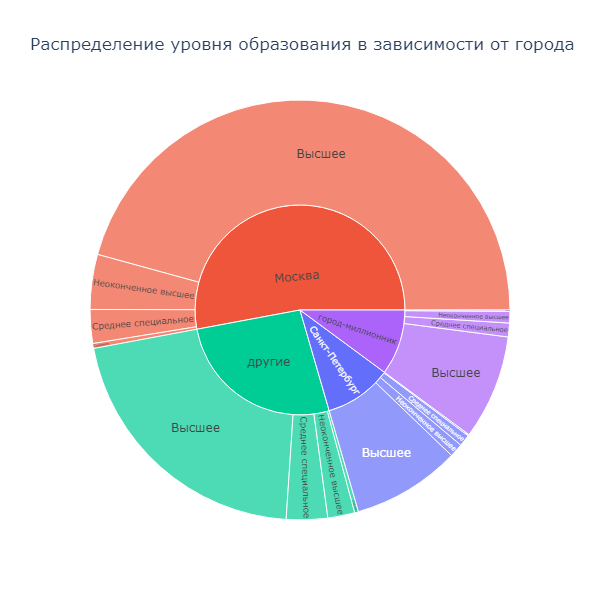

In [62]:
fig = px.sunburst(df, path=['Образование', 'Город'][::-1], values='ЗП (руб)', color='Город', title = 'Распределение уровня образования в зависимости от города')
fig.layout.width = 600
fig.layout.height = 600
fig.show('png')

На круговой диаграмме видно общее финансовое распределение по городам и образованию. Чуть больше половины всех денег зарабатывается в Москве преимущественно обладателями высшего образования. Четверть зарабатывается в других городах, по восьмой части в Санкт-Петербурге и городах-миллионниках.

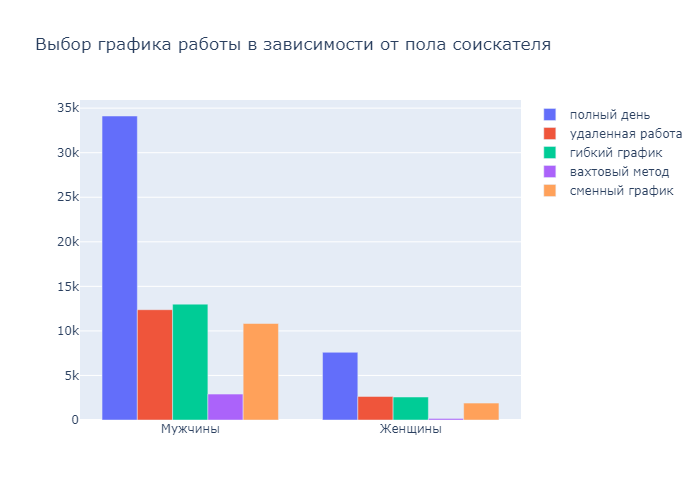

In [63]:
schedules = ['полный день', 'удаленная работа', 'гибкий график', 'вахтовый метод', 'сменный график']

bar_data = []
for schedule in schedules:
    y1 = sum((df['Пол'] == 'М') & (df[schedule]))
    y2 = sum((df['Пол'] == 'Ж') & (df[schedule]))
    bar_data.append(go.Bar(x=['Мужчины', 'Женщины'], y=[y1, y2], name=schedule))

fig = go.Figure(
    data=bar_data,
    layout=go.Layout(title='Выбор графика работы в зависимости от пола соискателя')
)
fig.show('png')

На данном графике мы видим, какие графики работы предпочитают мужчины и женщины. В обеих категориях преобладает полный рабочий день, примерно троекратно опережая гибкий график и удаленную работу, которые сопоставимы, так как, вероятнее всего, указываются вместе. Вахтовый метод наименее популярен, причем у женщин почти отсутсвует, скорее всего, в связи с совмещением работы с семейными обязанностями.  

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [64]:
#Сколько полных копий удалось найти?
df.duplicated().sum()

161

In [65]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [66]:
# Число пропусков в столбцах
df.isnull().sum()
#Сколько пропусков в столбце «Опыт работы (месяц)»?
#168

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [67]:
# Удаление
df.dropna(subset=['Последнее/нынешнее место работы'],inplace=True)
df.dropna(subset=['Последняя/нынешняя должность'],inplace=True)
# Заполнение медианным значением
df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median(), inplace = True)
df.isnull().sum();

#Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? 
#Ответ округлите до целых.
round(df['Опыт работы (месяц)'].mean())

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [110]:
# Сколько выбросов вы нашли?
df.loc[((df['ЗП (руб)'] > 1000000)|(df['ЗП (руб)' ] < 1000))].count()
# 89
# Удаление таких резюме 
df.drop(df.loc[((df['ЗП (руб)'] > 1000000)|(df['ЗП (руб)' ] < 1000))].index, inplace=True)
# df.loc[((df['ЗП (руб)'] > 1000000)|(df['ЗП (руб)' ] < 1000))].count()

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [68]:
# Сколько выбросов вы нашли?
df.loc[df['Опыт работы (месяц)']/12>df['Возраст']].count()
# 7
# Удаление таких резюме
df.drop(df.loc[df['Опыт работы (месяц)']/12>df['Возраст']].index, inplace=True)
# df.loc[df['Опыт работы (месяц)']/12>df['Возраст']].count()

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

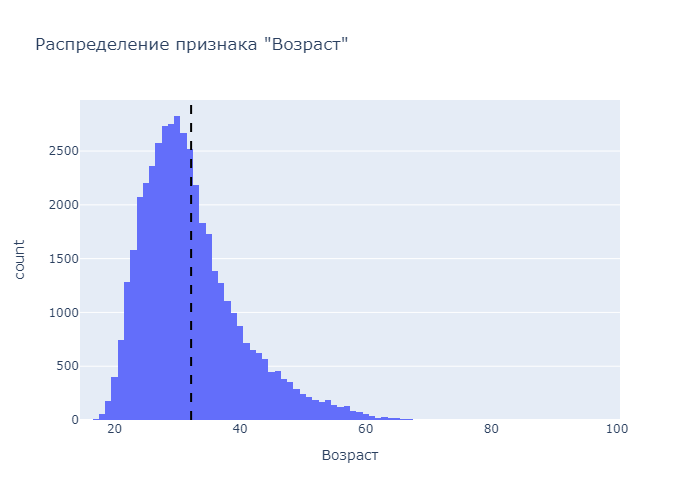

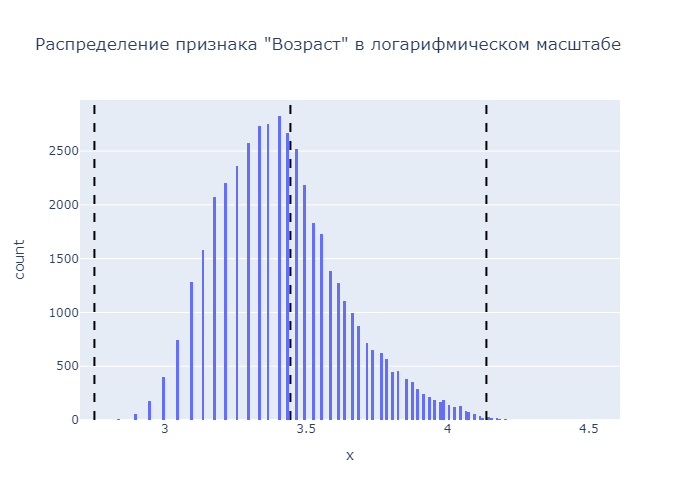

In [69]:
# Построение распределений признака "Возраст"
log_age = np.log(df['Возраст'])
fig0 = px.histogram(df, x='Возраст', title='Распределение признака "Возраст"')
fig = px.histogram(df, x=log_age, title='Распределение признака "Возраст" в логарифмическом масштабе')
fig0.add_vline(x=df['Возраст'].mean(), line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=log_age.mean(), line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=log_age.mean() + 3 *log_age.std(), line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=log_age.mean() - 3 *log_age.std() , line_width=2, line_dash="dash", line_color="black")
fig0.show('png')
fig.show('png')

ваш коммментарий здесь:
*В какую сторону асимметрично логарифмическое распределение?* \
Логарифмическое распределение ассиметрично в правую сторону.

In [70]:
# Поиск выбросов с помощью метода z-отклонений
x = np.log(df["Возраст"])
sigma = x.std()
low_bound = x.mean() - 3 * sigma
upp_bound = x.mean() + 4 * sigma
outliers = df[(x < low_bound) | (x > upp_bound)]
clean = df[(x > low_bound) & (x < upp_bound)]

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {clean.shape[0]}')
print(outliers)

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44571
            Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами        2019-04-06  Не указано   
32950                  Тестировщик ПО        2019-04-09  Не указано   
33654            Frontend-разработчик        2019-04-19  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
31137              Среднее   М       15                  2.0  Санкт-Петербург   
32950  Среднее специальное   М       15                  3.0           другие   
33654  Среднее специальное   М      100                 30.0  Санкт-Петербург   

       ...  частична

Соискатели с возрастами 15 лет (2 чел.) и 100 лет (1 чел.) попали под категорию выбросов после применения метода z-отклонения.